In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv('C:\\Users\\SRINIVASA SESHADRI K\\OneDrive\\Documents\\Unified Mentor Data Analytics Internship\\Coffee_Sales Project\\index.csv')

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [7]:
data.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [8]:
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [9]:
data.shape

(1133, 6)

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1128    False
1129    False
1130    False
1131    False
1132    False
Length: 1133, dtype: bool

In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull()

,date,datetime,cash_type,card,money,coffee_name
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1128,False,False,False,False,False,False
1129,False,False,False,False,False,False
1130,False,False,False,False,False,False
1131,False,False,False,False,False,False


In [13]:
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [14]:
data.isnull().sum().sum()

89

In [13]:
data['cash_type'].value_counts()

card    1044
cash      89
Name: cash_type, dtype: int64

In [15]:
import matplotlib.pyplot as plt


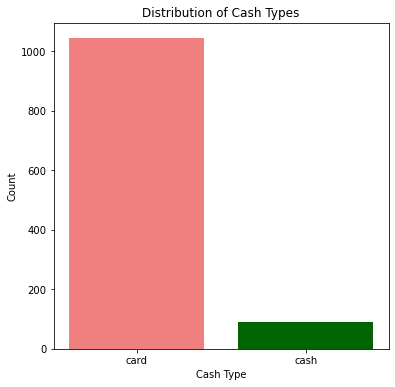

In [16]:
cash_type_counts = {'card': 1044, 'cash':89}  # From the provided data

# Data to plot
labels = list(cash_type_counts.keys())
sizes = list(cash_type_counts.values())
color = ['lightcoral','darkgreen']
# Plot
plt.figure(figsize=(6, 6))
plt.bar(labels, sizes, color=color)
plt.xlabel('Cash Type')
plt.ylabel('Count')
plt.title('Distribution of Cash Types')
plt.show()

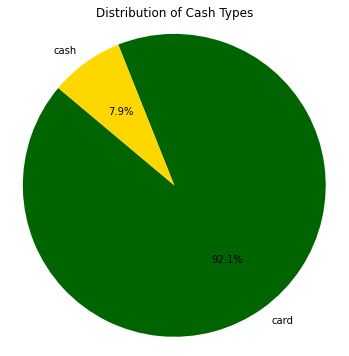

In [17]:
cash_type_counts = {'card': 1044, 'cash':89}  
labels = list(cash_type_counts.keys())
sizes = list(cash_type_counts.values())
colors = ['darkgreen', 'gold']
explode = (0,0) 
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Distribution of Cash Types')
plt.axis('equal')  

plt.show()

In [18]:
from datetime import datetime

In [19]:
data['date']=pd.to_datetime(data['date'])
data['datetime']=pd.to_datetime(data['datetime'])

In [20]:
data.drop('date', axis=1, inplace=True)

In [21]:
data['money'] = pd.to_numeric(data['money'])

In [22]:
import seaborn as sns

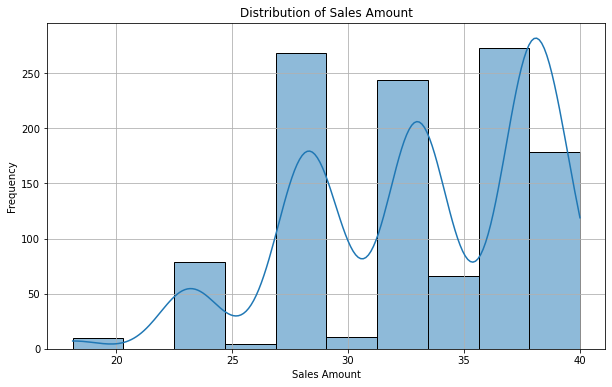

In [23]:
#Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['money'], bins=10, kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

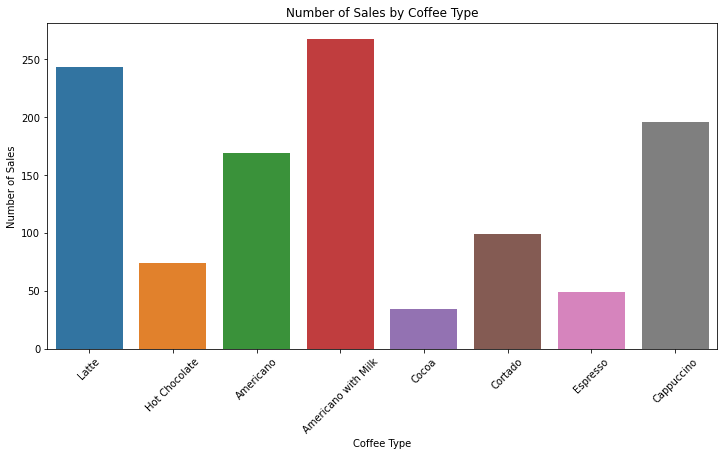

In [24]:
#Univariate Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='coffee_name')
plt.title('Number of Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

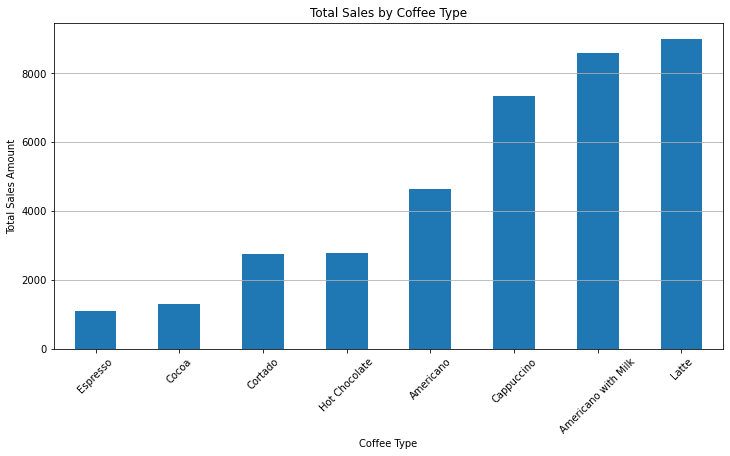

In [25]:
#Bivariate Analysis
coffee_sales = data.groupby('coffee_name')['money'].sum().sort_values()

plt.figure(figsize=(12, 6))
coffee_sales.plot(kind='bar')
plt.title('Total Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

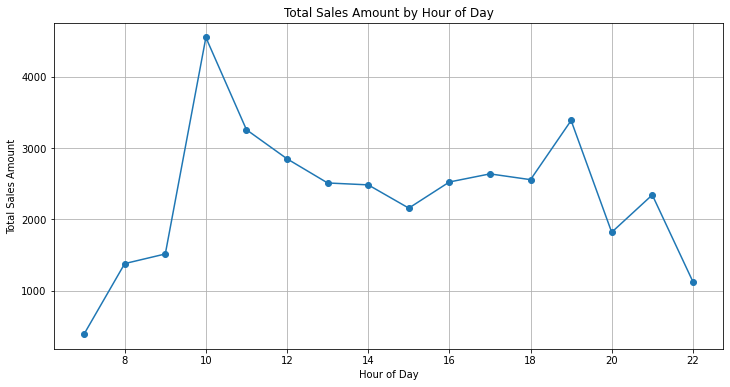

In [26]:
#Bivariate Analysis
data['hour'] = data['datetime'].dt.hour

# Aggregate sales by hour
sales_by_hour = data.groupby('hour')['money'].sum()

plt.figure(figsize=(12, 6))
sales_by_hour.plot(kind='line', marker='o')
plt.title('Total Sales Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

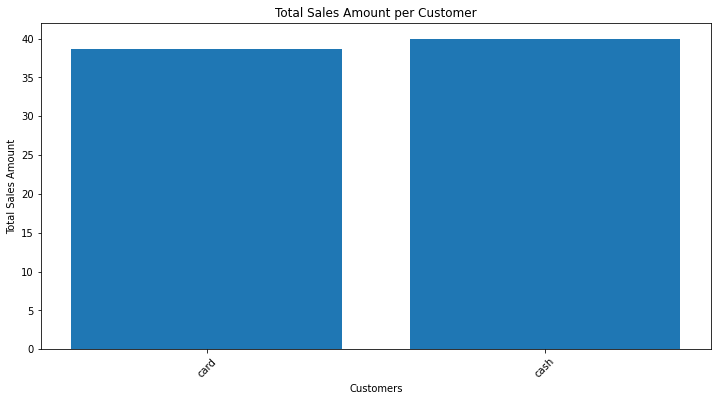

In [27]:
#Customer Analysis
plt.figure(figsize=(12, 6))
plt.bar(data['cash_type'], data['money'])
plt.title('Total Sales Amount per Customer')
plt.xlabel('Customers')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

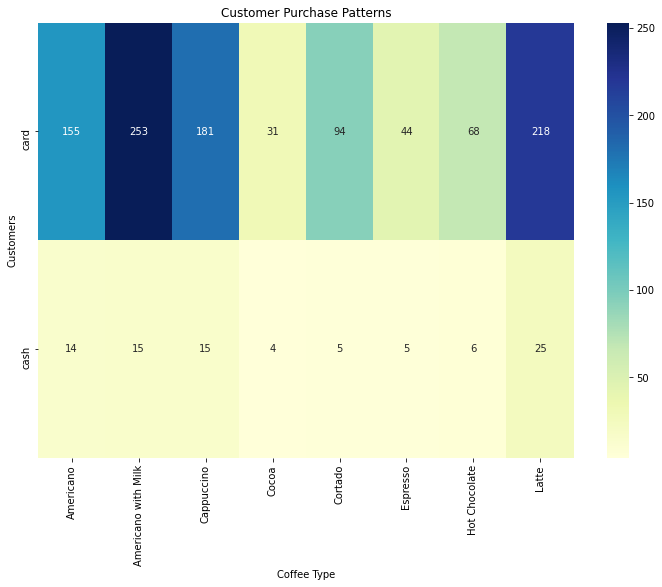

In [28]:
customer_summary = data.groupby(['cash_type', 'coffee_name']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(customer_summary, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Purchase Patterns')
plt.xlabel('Coffee Type')
plt.ylabel('Customers')
plt.show()

In [34]:
print(data['datetime'].dtype)

datetime64[ns]


In [35]:
data.set_index('datetime', inplace=True)

In [36]:
data['hour'] = data.index.hour
data['month'] = data.index.month
data['minute'] = data.index.minute
data['second'] = data.index.second
data['day_of_month'] = data.index.day
data['week_of_year'] = data.index.isocalendar().week
data['day_of_week'] = data.index.dayofweek

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1133 entries, 2024-03-01 10:15:50.520000 to 2024-07-31 21:55:16.570000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cash_type     1133 non-null   object 
 1   card          1044 non-null   object 
 2   money         1133 non-null   float64
 3   coffee_name   1133 non-null   object 
 4   hour          1133 non-null   int64  
 5   month         1133 non-null   int64  
 6   minute        1133 non-null   int64  
 7   second        1133 non-null   int64  
 8   day_of_month  1133 non-null   int64  
 9   week_of_year  1133 non-null   UInt32 
 10  day_of_week   1133 non-null   int64  
dtypes: UInt32(1), float64(1), int64(6), object(3)
memory usage: 102.9+ KB


In [38]:
data.head(10)

,cash_type,card,money,coffee_name,hour,month,minute,second,day_of_month,week_of_year,day_of_week
datetime,,,,,,,,,,,
2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,3,15,50,1,9,4
2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3,19,22,1,9,4
2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,3,20,18,1,9,4
2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,3,46,33,1,9,4
2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,3,48,14,1,9,4
2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk,15,3,39,47,1,9,4
2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate,16,3,19,2,1,9,4
2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk,18,3,39,3,1,9,4
2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa,19,3,22,1,1,9,4


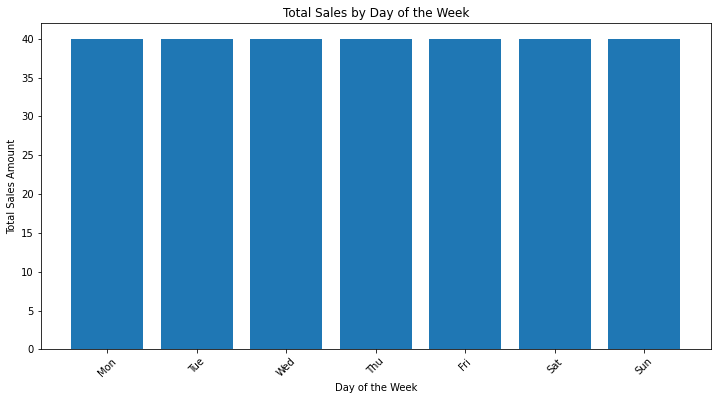

In [39]:
plt.figure(figsize=(12, 6))
plt.bar(data['day_of_week'],data['money'])
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

In [40]:
#Calculating daily sales
daily_sales = data['money'].resample('D').sum()
data['daily_sales'] = data['money'].resample('D').transform('sum')
data

,cash_type,card,money,coffee_name,hour,month,minute,second,day_of_month,week_of_year,day_of_week,daily_sales
datetime,,,,,,,,,,,,
2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10,3,15,50,1,9,4,396.30
2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,3,19,22,1,9,4,396.30
2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,3,20,18,1,9,4,396.30
2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13,3,46,33,1,9,4,396.30
2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13,3,48,14,1,9,4,396.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,20,7,53,35,31,31,2,633.84
2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,20,7,59,25,31,31,2,633.84
2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,21,7,26,26,31,31,2,633.84


In [41]:
#Calculating Cumulative Sales
data['cumulative_sales'] = data['money'].cumsum()
data

,cash_type,card,money,coffee_name,hour,month,minute,second,day_of_month,week_of_year,day_of_week,daily_sales,cumulative_sales
datetime,,,,,,,,,,,,,
2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10,3,15,50,1,9,4,396.30,38.70
2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,3,19,22,1,9,4,396.30,77.40
2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,3,20,18,1,9,4,396.30,116.10
2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13,3,46,33,1,9,4,396.30,145.00
2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13,3,48,14,1,9,4,396.30,183.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,20,7,53,35,31,31,2,633.84,37382.50
2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,20,7,59,25,31,31,2,633.84,37410.42
2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,21,7,26,26,31,31,2,633.84,37443.24


In [42]:
#Calculating average Sales per Transaction
data['avg_sales_per_transaction'] = data['money'].mean()
data

,cash_type,card,money,coffee_name,hour,month,minute,second,day_of_month,week_of_year,day_of_week,daily_sales,cumulative_sales,avg_sales_per_transaction
datetime,,,,,,,,,,,,,,
2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10,3,15,50,1,9,4,396.30,38.70,33.105808
2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,3,19,22,1,9,4,396.30,77.40,33.105808
2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,3,20,18,1,9,4,396.30,116.10,33.105808
2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13,3,46,33,1,9,4,396.30,145.00,33.105808
2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13,3,48,14,1,9,4,396.30,183.70,33.105808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,20,7,53,35,31,31,2,633.84,37382.50,33.105808
2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,20,7,59,25,31,31,2,633.84,37410.42,33.105808
2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,21,7,26,26,31,31,2,633.84,37443.24,33.105808


In [43]:
# indicating whether a purchase was made on a weekend or weekday
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
data

,cash_type,card,money,coffee_name,hour,month,minute,second,day_of_month,week_of_year,day_of_week,daily_sales,cumulative_sales,avg_sales_per_transaction,is_weekend
datetime,,,,,,,,,,,,,,,
2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10,3,15,50,1,9,4,396.30,38.70,33.105808,0
2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,3,19,22,1,9,4,396.30,77.40,33.105808,0
2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,3,20,18,1,9,4,396.30,116.10,33.105808,0
2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13,3,46,33,1,9,4,396.30,145.00,33.105808,0
2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13,3,48,14,1,9,4,396.30,183.70,33.105808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,20,7,53,35,31,31,2,633.84,37382.50,33.105808,0
2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,20,7,59,25,31,31,2,633.84,37410.42,33.105808,0
2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,21,7,26,26,31,31,2,633.84,37443.24,33.105808,0


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
X = data[['week_of_year', 'month', 'day_of_month','hour', 'minute', 'second', 'day_of_week']]
y = data['money']

In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Initializing and training the model using random forest 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
# Predictions
y_pred = rf.predict(X_test)

In [50]:
# Evaluating the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 3.914301321585901
Mean Squared Error: 22.573183200704783


In [51]:
from sklearn.svm import SVR

In [52]:
# Initializing and training the model using support vector machine
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [53]:
# Predictions
y_pred = svr.predict(X_test)

In [54]:
# Evaluating the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 3.5475844932732192
Mean Squared Error: 18.70830012356932


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
# Initializing and training the model using Gradient Boost
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [57]:
# Predictions
y_pred = gbr.predict(X_test)

In [58]:
# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 3.832452362506019
Mean Squared Error: 20.876610675882734


In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [60]:
X = data[['week_of_year', 'month', 'day_of_month','hour', 'minute', 'second', 'day_of_week']]
y = data['money']

In [61]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Initializing and training the model using decision tree
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [63]:
# Predict on the test set
y_pred = dt_regressor.predict(X_test)

In [65]:
# Evaluating the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.943348017621147
Mean Squared Error: 44.722680176211455
